# Importing libraries

In [3]:
#import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import skimage
#from tensorflow import keras
from skimage import transform
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.filters import threshold_mean
from tqdm import tqdm

In [10]:
imag = np.arange(5)
w=np.einsum('i,j->ij',imag,imag)
print(w)


[[ 0  0  0  0  0]
 [ 0  1  2  3  4]
 [ 0  2  4  6  8]
 [ 0  3  6  9 12]
 [ 0  4  8 12 16]]


# Functions

In [2]:
def plot(a,ix,iy):
    a=a.reshape(ix,iy)
    plt.imshow(a,cmap='viridis')
    plt.axis('off')
    
def imageprepare(image,ix,iy):
  image=resize(image,(ix,iy),mode='reflect')
  image=(image>threshold_mean(image))*2-1
  image=np.reshape(image,ix*iy)
  return image

# Image preparation

In [3]:
# Image size : ix*iy
ix=128
iy=128

it=1 # Number of iterations

# Loading images
camera = skimage.data.camera()
astronaut = rgb2gray(skimage.data.astronaut())
data=[camera, astronaut]

datatest=[]
for i in range(len(data)):
    datatest.append(skimage.util.random_noise(data[i], mode='gaussian',clip=False,var=0.5))

train=[]
test=[]
for i in range(len(data)):
  train.append(imageprepare(data[i],ix,iy))
  test.append(imageprepare(datatest[i],ix,iy))

train=np.array(train)
test=np.array(test)  

num_data =  len(train)
num_neuron = train[0].shape[0]

# Weight initialization

In [8]:
w=np.zeros([num_neuron,num_neuron])


for i in tqdm(range(len(train))):
    rho=sum(train[i])/(num_neuron)
    imag=train[i]-rho
    w+=np.einsum('i,j->ij',imag,imag)
diagW = np.diag(np.diag(w))
w = w - diagW
w /= num_data

100%|██████████| 2/2 [00:01<00:00,  1.09it/s]


# Network test

In [1]:
print(test.shape)

NameError: name 'test' is not defined

100%|██████████| 2/2 [00:00<00:00,  3.65it/s]


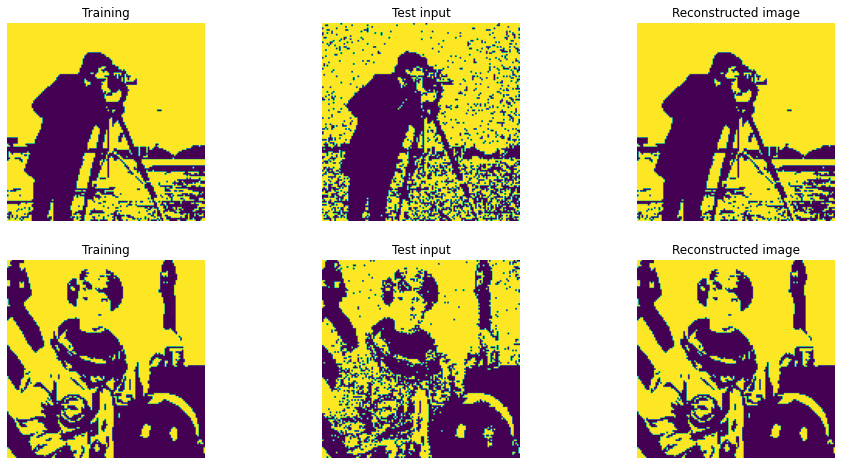

In [11]:
out=[]

for i in tqdm(range(len(test))):
    testr=np.copy(test[i])
    for j in range(it):
        testr=np.sign(w@testr)
    out.append(testr)

out=np.array(out)

plt.figure(figsize=(16,8))
for i in range(len(test)):
    plt.subplot(len(test),3,3*i+1);plot(train[i],ix,iy);plt.title('Training')
    plt.subplot(len(test),3,3*i+2);plot(test[i],ix,iy);plt.title('Test input')
    plt.subplot(len(test),3,3*i+3);plot(out[i],ix,iy);plt.title('Reconstructed image')